In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm

from lusi.svm import SVMIRandomBoxes
from lusi.invariants import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
diabetes_df = pd.read_csv('data/diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Get the data and split it in train and test
X, y = diabetes_df.drop('Outcome', axis=1).values, diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=47)

In [4]:
# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Run experiments
accuracies = []

for num_invariants in range(2, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:18<00:00, 12.82it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:36<00:00, 10.41it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:55<00:00,  8.68it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:14<00:00,  7.45it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:54<00:00,  5.74it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:58<00:00,  5.61it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:21<00:00,  4.96it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:52<00:00,  4.30it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:58<00:00,  4.19it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:17<00:00,  3.88it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:38<00:00,  3.59it/s]


[]

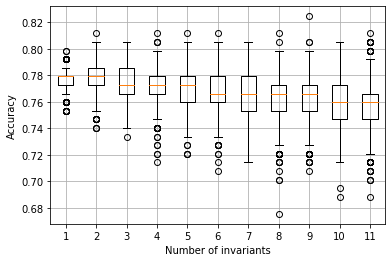

In [6]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

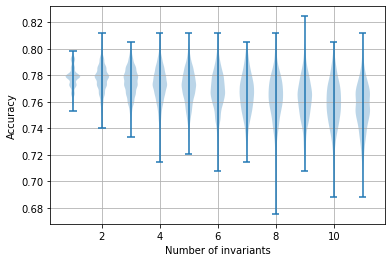

In [7]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [8]:
svm_baseline = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 1 invariants: 644
Number of elements with accuracy > 0.7792207792207793 using 1 invariants: 234
Max. accuracy: 0.7987012987012987

Number of elements with accuracy >= 0.7792207792207793 using 2 invariants: 583
Number of elements with accuracy > 0.7792207792207793 using 2 invariants: 286
Max. accuracy: 0.8116883116883117

Number of elements with accuracy >= 0.7792207792207793 using 3 invariants: 481
Number of elements with accuracy > 0.7792207792207793 using 3 invariants: 255
Max. accuracy: 0.8051948051948052

Number of elements with accuracy >= 0.7792207792207793 using 4 invariants: 407
Number of elements with accuracy > 0.7792207792207793 using 4 invariants: 225
Max. accuracy: 0.8116883116883117

Number of elements with accuracy >= 0.7792207792207793 using 5 invariants: 363
Number of elements with accuracy > 0.7792207792207793 using 5 invariants: 198
Max. accuracy: 0.8116883116883117

N

In [9]:
# Run experiments
accuracies = []

for num_invariants in range(2, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.3)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:41<00:00,  9.81it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:56<00:00,  8.58it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:20<00:00,  7.13it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:55<00:00,  5.70it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:55<00:00,  5.69it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:36<00:00,  4.62it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:55<00:00,  4.24it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:14<00:00,  3.94it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:18<00:00,  3.14it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:52<00:00,  2.83it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:48<00:00,  2.45it/s]


[]

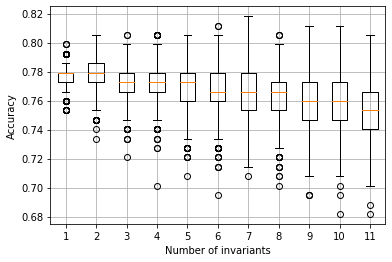

In [10]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

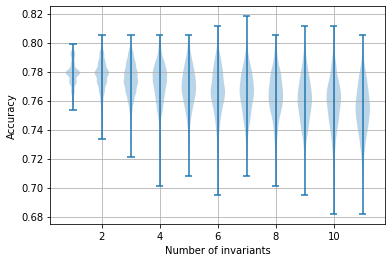

In [11]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [12]:
svm_baseline = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 1 invariants: 639
Number of elements with accuracy > 0.7792207792207793 using 1 invariants: 240
Max. accuracy: 0.7987012987012987

Number of elements with accuracy >= 0.7792207792207793 using 2 invariants: 586
Number of elements with accuracy > 0.7792207792207793 using 2 invariants: 283
Max. accuracy: 0.8051948051948052

Number of elements with accuracy >= 0.7792207792207793 using 3 invariants: 450
Number of elements with accuracy > 0.7792207792207793 using 3 invariants: 245
Max. accuracy: 0.8051948051948052

Number of elements with accuracy >= 0.7792207792207793 using 4 invariants: 429
Number of elements with accuracy > 0.7792207792207793 using 4 invariants: 225
Max. accuracy: 0.8051948051948052

Number of elements with accuracy >= 0.7792207792207793 using 5 invariants: 326
Number of elements with accuracy > 0.7792207792207793 using 5 invariants: 182
Max. accuracy: 0.8051948051948052

N

# Trying different train/test partitions

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(2, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:17<00:00, 12.89it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:49<00:00, 20.37it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:38<00:00, 10.11it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:44<00:00,  9.61it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:09<00:00,  7.74it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:51<00:00,  8.99it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:03<00:00,  8.11it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:17<00:00,  7.27it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:36<00:00,  6.38it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:49<00:00,  5.91it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:37<00:00,  4.59it/s]


[]

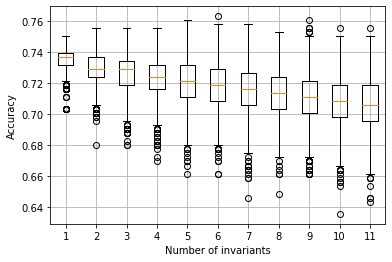

In [14]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

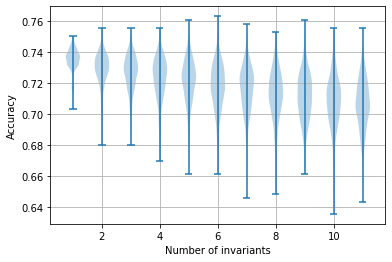

In [15]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [16]:
svm_baseline = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7421875

Number of elements with accuracy >= 0.7421875 using 1 invariants: 200
Number of elements with accuracy > 0.7421875 using 1 invariants: 93
Max. accuracy: 0.75

Number of elements with accuracy >= 0.7421875 using 2 invariants: 92
Number of elements with accuracy > 0.7421875 using 2 invariants: 38
Max. accuracy: 0.7552083333333334

Number of elements with accuracy >= 0.7421875 using 3 invariants: 74
Number of elements with accuracy > 0.7421875 using 3 invariants: 36
Max. accuracy: 0.7552083333333334

Number of elements with accuracy >= 0.7421875 using 4 invariants: 66
Number of elements with accuracy > 0.7421875 using 4 invariants: 36
Max. accuracy: 0.7552083333333334

Number of elements with accuracy >= 0.7421875 using 5 invariants: 59
Number of elements with accuracy > 0.7421875 using 5 invariants: 36
Max. accuracy: 0.7604166666666666

Number of elements with accuracy >= 0.7421875 using 6 invariants: 39
Number of elements with accuracy > 0.7421875 using 6 i

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(2, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.61it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:59<00:00, 16.68it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:22<00:00, 12.08it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:43<00:00,  9.68it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:08<00:00,  7.80it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:28<00:00,  6.72it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:02<00:00,  5.49it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:10<00:00,  5.26it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:26<00:00,  4.85it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:53<00:00,  4.28it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:12<00:00,  3.96it/s]


[]

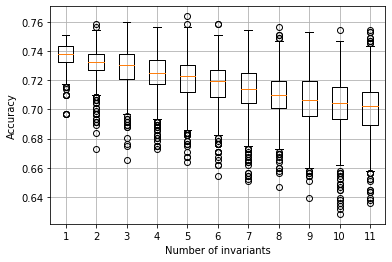

In [18]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

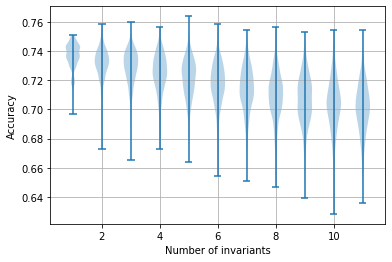

In [19]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [20]:
svm_baseline = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.741635687732342

Number of elements with accuracy >= 0.741635687732342 using 1 invariants: 384
Number of elements with accuracy > 0.741635687732342 using 1 invariants: 306
Max. accuracy: 0.7509293680297398

Number of elements with accuracy >= 0.741635687732342 using 2 invariants: 162
Number of elements with accuracy > 0.741635687732342 using 2 invariants: 107
Max. accuracy: 0.758364312267658

Number of elements with accuracy >= 0.741635687732342 using 3 invariants: 143
Number of elements with accuracy > 0.741635687732342 using 3 invariants: 87
Max. accuracy: 0.7602230483271375

Number of elements with accuracy >= 0.741635687732342 using 4 invariants: 105
Number of elements with accuracy > 0.741635687732342 using 4 invariants: 74
Max. accuracy: 0.7565055762081785

Number of elements with accuracy >= 0.741635687732342 using 5 invariants: 58
Number of elements with accuracy > 0.741635687732342 using 5 invariants: 35
Max. accuracy: 0.7639405204460966

Number of element

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(2, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:05<00:00, 15.33it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:02<00:00,  8.18it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:23<00:00,  6.98it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:39<00:00,  6.28it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:52<00:00,  5.79it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:08<00:00,  5.32it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:26<00:00,  4.83it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:41<00:00,  4.52it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:56<00:00,  4.23it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:12<00:00,  3.96it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:28<00:00,  3.72it/s]


[]

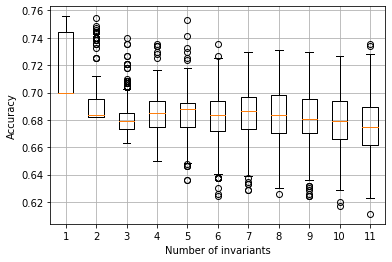

In [22]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

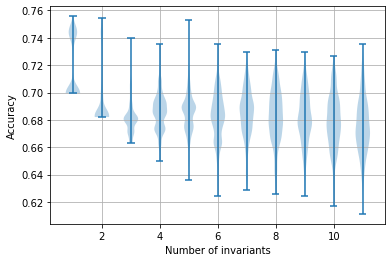

In [23]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [24]:
svm_baseline = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7456647398843931

Number of elements with accuracy >= 0.7456647398843931 using 1 invariants: 11
Number of elements with accuracy > 0.7456647398843931 using 1 invariants: 11
Max. accuracy: 0.7557803468208093

Number of elements with accuracy >= 0.7456647398843931 using 2 invariants: 4
Number of elements with accuracy > 0.7456647398843931 using 2 invariants: 3
Max. accuracy: 0.7543352601156069

Number of elements with accuracy >= 0.7456647398843931 using 3 invariants: 0
Number of elements with accuracy > 0.7456647398843931 using 3 invariants: 0
Max. accuracy: 0.7398843930635838

Number of elements with accuracy >= 0.7456647398843931 using 4 invariants: 0
Number of elements with accuracy > 0.7456647398843931 using 4 invariants: 0
Max. accuracy: 0.7355491329479769

Number of elements with accuracy >= 0.7456647398843931 using 5 invariants: 1
Number of elements with accuracy > 0.7456647398843931 using 5 invariants: 1
Max. accuracy: 0.7528901734104047

Number of elements 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(2, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 17.07it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:53<00:00,  8.81it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:20<00:00,  7.11it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:44<00:00,  6.08it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:06<00:00,  5.36it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:23<00:00,  4.91it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:50<00:00,  4.34it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:27<00:00,  3.74it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:53<00:00,  3.40it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:26<00:00,  3.07it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [07:36<00:00,  2.19it/s]


[]

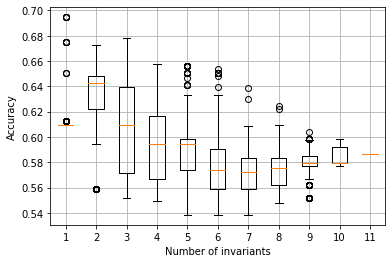

In [5]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

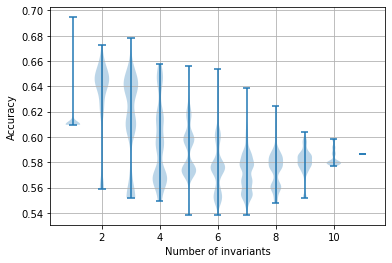

In [6]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [7]:
svm_baseline = SVMIRandomBoxes(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.684931506849315

Number of elements with accuracy >= 0.684931506849315 using 1 invariants: 5
Number of elements with accuracy > 0.684931506849315 using 1 invariants: 5
Max. accuracy: 0.6945205479452055

Number of elements with accuracy >= 0.684931506849315 using 2 invariants: 0
Number of elements with accuracy > 0.684931506849315 using 2 invariants: 0
Max. accuracy: 0.6726027397260274

Number of elements with accuracy >= 0.684931506849315 using 3 invariants: 0
Number of elements with accuracy > 0.684931506849315 using 3 invariants: 0
Max. accuracy: 0.678082191780822

Number of elements with accuracy >= 0.684931506849315 using 4 invariants: 0
Number of elements with accuracy > 0.684931506849315 using 4 invariants: 0
Max. accuracy: 0.6575342465753424

Number of elements with accuracy >= 0.684931506849315 using 5 invariants: 0
Number of elements with accuracy > 0.684931506849315 using 5 invariants: 0
Max. accuracy: 0.6561643835616439

Number of elements with accuracy 